In [1]:
#Test flow cytometry data output counts-poisson model fit
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro, anderson, poisson, chisquare, skew, skewtest
import statsmodels.api as sm

# Specify the path to your CSV file
df = pd.read_csv('844-224v1_081723 CD4+CD127 counts.csv')

df = pd.DataFrame(df)
#print(df)

In [2]:
# Create a new DataFrame with repeated values based on counts
result_array = np.repeat(df['value'], df['count'])
result_df = pd.DataFrame({'value': np.repeat(df['value'], df['count'])})

# Convert the result to a NumPy array if needed
result_array = result_df['value'].to_numpy()

print(result_array)

#estimate appropriate bin sizes based on data
#auto: Maximum of the ‘sturges’ and ‘fd’ estimators. Provides good all around performance
bin_size1 = np.histogram_bin_edges(result_array, bins='auto')
print("\nEstimated Bin Number using Auto Rule:", len(bin_size1) -1 )

[-6.37348953e+01 -2.54780736e+00  5.09762992e+01  7.26716592e+01
  1.31571255e+02  2.16935283e+02  2.32611444e+02  2.45719852e+02
  2.58872038e+02  2.68106115e+02  2.69427189e+02  2.70748752e+02
  2.81339192e+02  2.83991892e+02  2.90632806e+02  3.06626343e+02
  3.13314318e+02  3.22702233e+02  3.25389929e+02  3.25389929e+02
  3.29426096e+02  3.45627864e+02  3.57841586e+02  3.74214309e+02
  3.87938694e+02  3.89315300e+02  3.94829474e+02  4.05895761e+02
  4.19802113e+02  4.30988259e+02  4.36602336e+02  4.36602336e+02
  4.53531482e+02  4.54948269e+02  4.66316917e+02  4.66316917e+02
  4.66316917e+02  5.09522731e+02  5.09522731e+02  5.10979339e+02
  5.30017211e+02  5.41829617e+02  5.46278862e+02  5.76224291e+02
  6.02085368e+02  6.19030266e+02  6.31462574e+02  6.33023202e+02
  7.11411752e+02  7.22937200e+02  8.65029603e+02  8.74159515e+02
  8.94453384e+02  9.20708461e+02  1.03706722e+03  1.12182474e+03
  1.37178299e+03  1.54203254e+03  1.84773678e+03  1.96680559e+03
  2.02745489e+03  2.03131

In [3]:
#read in second dataset
# Specify the path to your CSV file
df2 = pd.read_csv('844-224v1_100323 CD4+CD127 counts.csv')

df2 = pd.DataFrame(df2)
#print(df2)

# Create a new DataFrame with repeated values based on counts
result_array2 = np.repeat(df2['value'], df2['count'])
result_df2 = pd.DataFrame({'value': np.repeat(df2['value'], df2['count'])})

# Convert the result to a NumPy array if needed
result_array2 = result_df2['value'].to_numpy()

print(result_array2)

#estimate appropriate bin sizes based on data
#auto: Maximum of the ‘sturges’ and ‘fd’ estimators. Provides good all around performance
bin_size1 = np.histogram_bin_edges(result_array2, bins='auto')
print("\nEstimated Bin Number using Auto Rule:", len(bin_size1) -1 )

[ -21.65784512   62.45862598   63.73489531  154.7305845   156.0195291
  244.4070866   262.8266481   286.6466749   295.9551598   310.6373877
  320.0169734   411.4483296   417.0141559   426.7869555   489.2437293
  499.3570191   508.0672227   518.2790145   573.206961    600.5533096
  640.8486644   640.8486644   667.7409673   696.7188144   726.246183
  744.5754757   825.5336083   935.9330577  1020.713058   1068.255007
 1100.15143    1113.11536    1198.103251   1237.831941   1278.689468
 1315.721214   1328.276579   1403.278791   1411.257297   1427.342195
 1443.599947   1446.326576   1462.789587   1485.019323   1513.264806
 1544.938581   1553.689045   1565.432319   1622.426876   1625.483354
 1647.041505   1684.673118   1719.93778    1802.939555   1879.433703
 1989.318014   2012.106745   2023.60609    2039.048657   2098.100766
 2247.548726   2371.859431   2939.860848   3034.542214   3138.92447
 3562.659965   3695.328811  ]

Estimated Bin Number using Auto Rule: 8


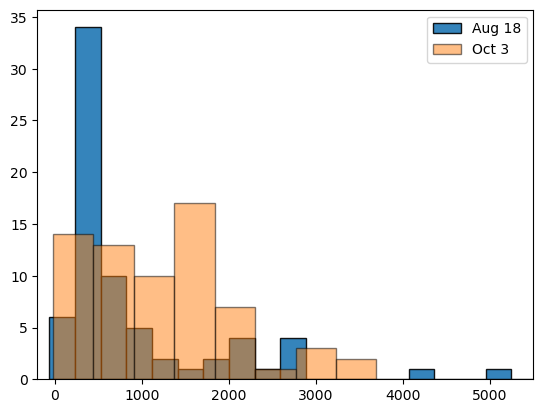

In [4]:
#plot data, exclude x-values >5500
#alpha value in plt.hist line indicates how bold the plotted bars are
#alpha = 1, indicates no transparency
plt.hist(result_array, bins=21, edgecolor='black', label='Aug 18', alpha=0.9)
plt.hist(result_array2, bins=8, edgecolor='black', label='Oct 3', alpha=0.5)
plt.xlim(-200, 5500)
plt.legend()
plt.show()

In [5]:
#test the distribution of dataset1
#does it follow a normal distribution?
#Shapiro-Wilk Test

# Assuming 'data' is your DataFrame or array of values
stat, p_value = shapiro(result_array)

print(f'Statistic: {stat}, p-value: {p_value}')

# Interpret the result
alpha = 0.05
if p_value > alpha:
    print("Data looks normally distributed (fail to reject H0)")
else:
    print("Data does not look normally distributed (reject H0)")


Statistic: 0.6828321218490601, p-value: 3.463337602815919e-11
Data does not look normally distributed (reject H0)


In [6]:
#Statistical Skewness Test

# Calculate skewness
skewness = skew(result_array)

# Perform skewness test
stat, p_value = skewtest(result_array)

print(f'Skewness: {skewness}, p-value: {p_value}')

# Interpret the result
alpha = 0.05
if p_value > alpha:
    print("Data is not significantly skewed (fail to reject H0)")
else:
    print("Data is significantly skewed (reject H0)")


Skewness: 2.390041219659027, p-value: 4.081638144101624e-09
Data is significantly skewed (reject H0)


In [7]:
#test the distribution of dataset2
#does it follow a normal distribution?
#Shapiro-Wilk Test

# Assuming 'data' is your DataFrame or array of values
stat, p_value = shapiro(result_array2)

print(f'Statistic: {stat}, p-value: {p_value}')

# Interpret the result
alpha = 0.05
if p_value > alpha:
    print("Data looks normally distributed (fail to reject H0)")
else:
    print("Data does not look normally distributed (reject H0)")


Statistic: 0.9347072839736938, p-value: 0.0016390517121180892
Data does not look normally distributed (reject H0)


In [8]:
#Statistical Skewness Test

# Calculate skewness
skewness = skew(result_array2)

# Perform skewness test
stat, p_value = skewtest(result_array2)

print(f'Skewness: {skewness}, p-value: {p_value}')

# Interpret the result
alpha = 0.05
if p_value > alpha:
    print("Data is not significantly skewed (fail to reject H0)")
else:
    print("Data is significantly skewed (reject H0)")


Skewness: 0.8304624892228856, p-value: 0.006260564287264707
Data is significantly skewed (reject H0)


In [9]:
#Since the data are skewed, need to use a distribution-free method
#Mann-Whitney Test (similar to a Wilcoxon rank sum test) Two (unpaired) samples
from scipy.stats import mannwhitneyu

# Assuming result_array and result_array2 are your data arrays

# Perform Mann-Whitney U test
statistic, p_value = mannwhitneyu(result_array, result_array2)

# Output the test statistic and p-value
print("Mann-Whitney U statistic:", statistic)
print("P-value:", p_value)

# Interpret the result
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference between the two groups.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference between the two groups.")


Mann-Whitney U statistic: 1697.0
P-value: 0.002596861941624176
Reject the null hypothesis. There is a significant difference between the two groups.


In [11]:
#####################
#Now compare the CD8 data
#####################

# Specify the path to your CSV file
df3 = pd.read_csv('844-224v1_081723 CD8+CD127 counts.csv')

df3 = pd.DataFrame(df3)
#print(df3)

# Create a new DataFrame with repeated values based on counts
result_array3 = np.repeat(df3['value'], df3['count'])
result_df3 = pd.DataFrame({'value': np.repeat(df3['value'], df3['count'])})

# Convert the result to a NumPy array if needed
result_array3 = result_df3['value'].to_numpy()

print(result_array3)

#estimate appropriate bin sizes based on data
#auto: Maximum of the ‘sturges’ and ‘fd’ estimators. Provides good all around performance
bin_size1 = np.histogram_bin_edges(result_array3, bins='auto')
print("\nEstimated Bin Number using Auto Rule:", len(bin_size1) -1 )

[ 161.1779274  179.2672673  181.8561581  184.4462833  213.0249301
  237.8497307  239.1603485  264.1457963  270.7487522  285.3190217
  290.6328063  303.9551771  305.2904755  315.9935966  342.921086
  398.9733417  412.8385342  436.6023363  445.0503846  502.2560965
  502.2560965  521.2067285  597.4933167  667.7409673  736.2164941
  799.2091681  859.5794846  994.5377802 1544.938581  1571.336786 ]

Estimated Bin Number using Auto Rule: 8


In [12]:
#read in second dataset
# Specify the path to your CSV file
df4 = pd.read_csv('844-224v1_100323 CD8+CD127 counts.csv')

df4 = pd.DataFrame(df4)
#print(df4)

# Create a new DataFrame with repeated values based on counts
result_array4 = np.repeat(df4['value'], df4['count'])
result_df4 = pd.DataFrame({'value': np.repeat(df4['value'], df4['count'])})

# Convert the result to a NumPy array if needed
result_array4 = result_df4['value'].to_numpy()

print(result_array4)

#estimate appropriate bin sizes based on data
#auto: Maximum of the ‘sturges’ and ‘fd’ estimators. Provides good all around performance
bin_size1 = np.histogram_bin_edges(result_array4, bins='auto')
print("\nEstimated Bin Number using Auto Rule:", len(bin_size1) -1 )

[ -16.56139649   67.56430345  180.5615596   521.2067285   534.4380464
  546.2788619   703.231807    830.8561721   939.7650087  1128.392263
 1170.710554   1235.464233   1244.958538   1427.342195  ]

Estimated Bin Number using Auto Rule: 5


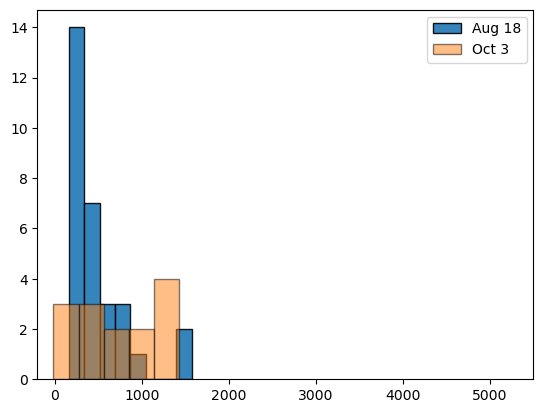

In [13]:
#plot data, exclude x-values >5500
#alpha value in plt.hist line indicates how bold the plotted bars are
#alpha = 1, indicates no transparency
plt.hist(result_array3, bins=8, edgecolor='black', label='Aug 18', alpha=0.9)
plt.hist(result_array4, bins=5, edgecolor='black', label='Oct 3', alpha=0.5)
plt.xlim(-200, 5500) #adjust based on sample values
plt.legend()
plt.show()

In [14]:
#test the distribution of dataset3
#does it follow a normal distribution?
#Shapiro-Wilk Test

# Assuming 'data' is your DataFrame or array of values
stat, p_value = shapiro(result_array3)

print(f'Statistic: {stat}, p-value: {p_value}')

# Interpret the result
alpha = 0.05
if p_value > alpha:
    print("Data looks normally distributed (fail to reject H0)")
else:
    print("Data does not look normally distributed (reject H0)")

#########################
#Statistical Skewness Test

# Calculate skewness
skewness = skew(result_array3)

# Perform skewness test
stat, p_value = skewtest(result_array3)

print(f'Skewness: {skewness}, p-value: {p_value}')

# Interpret the result
alpha = 0.05
if p_value > alpha:
    print("Data is not significantly skewed (fail to reject H0)")
else:
    print("Data is significantly skewed (reject H0)")


Statistic: 0.7781365513801575, p-value: 2.6855768737732433e-05
Data does not look normally distributed (reject H0)
Skewness: 1.7857585664930842, p-value: 0.00025899293032108074
Data is significantly skewed (reject H0)


In [15]:
#test the distribution of dataset3
#does it follow a normal distribution?
#Shapiro-Wilk Test

# Assuming 'data' is your DataFrame or array of values
stat, p_value = shapiro(result_array4)

print(f'Statistic: {stat}, p-value: {p_value}')

# Interpret the result
alpha = 0.05
if p_value > alpha:
    print("Data looks normally distributed (fail to reject H0)")
else:
    print("Data does not look normally distributed (reject H0)")

#########################
#Statistical Skewness Test

# Calculate skewness
skewness = skew(result_array4)

# Perform skewness test
stat, p_value = skewtest(result_array4)

print(f'Skewness: {skewness}, p-value: {p_value}')

# Interpret the result
alpha = 0.05
if p_value > alpha:
    print("Data is not significantly skewed (fail to reject H0)")
else:
    print("Data is significantly skewed (reject H0)")


Statistic: 0.942146360874176, p-value: 0.44651731848716736
Data looks normally distributed (fail to reject H0)
Skewness: -0.2443435212015778, p-value: 0.6288375927145164
Data is not significantly skewed (fail to reject H0)


In [16]:
#Since the data are skewed, need to use a distribution-free method
#Mann-Whitney Test (similar to a Wilcoxon rank sum test) Two (unpaired) samples
from scipy.stats import mannwhitneyu

# Assuming result_array and result_array2 are your data arrays

# Perform Mann-Whitney U test
statistic, p_value = mannwhitneyu(result_array3, result_array4)

# Output the test statistic and p-value
print("Mann-Whitney U statistic:", statistic)
print("P-value:", p_value)

# Interpret the result
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference between the two groups.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference between the two groups.")


Mann-Whitney U statistic: 135.5
P-value: 0.06221559206449605
Fail to reject the null hypothesis. There is no significant difference between the two groups.
